<a href="https://colab.research.google.com/github/seo-yunho/Data-Mining/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_6%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

iris = load_iris()
X, y = iris.data, iris.target

tree_model = DecisionTreeClassifier(min_samples_split = 5, random_state = 123)

tree_model.fit(X, y)

DecisionTreeClassifier(min_samples_split=5, random_state=123)

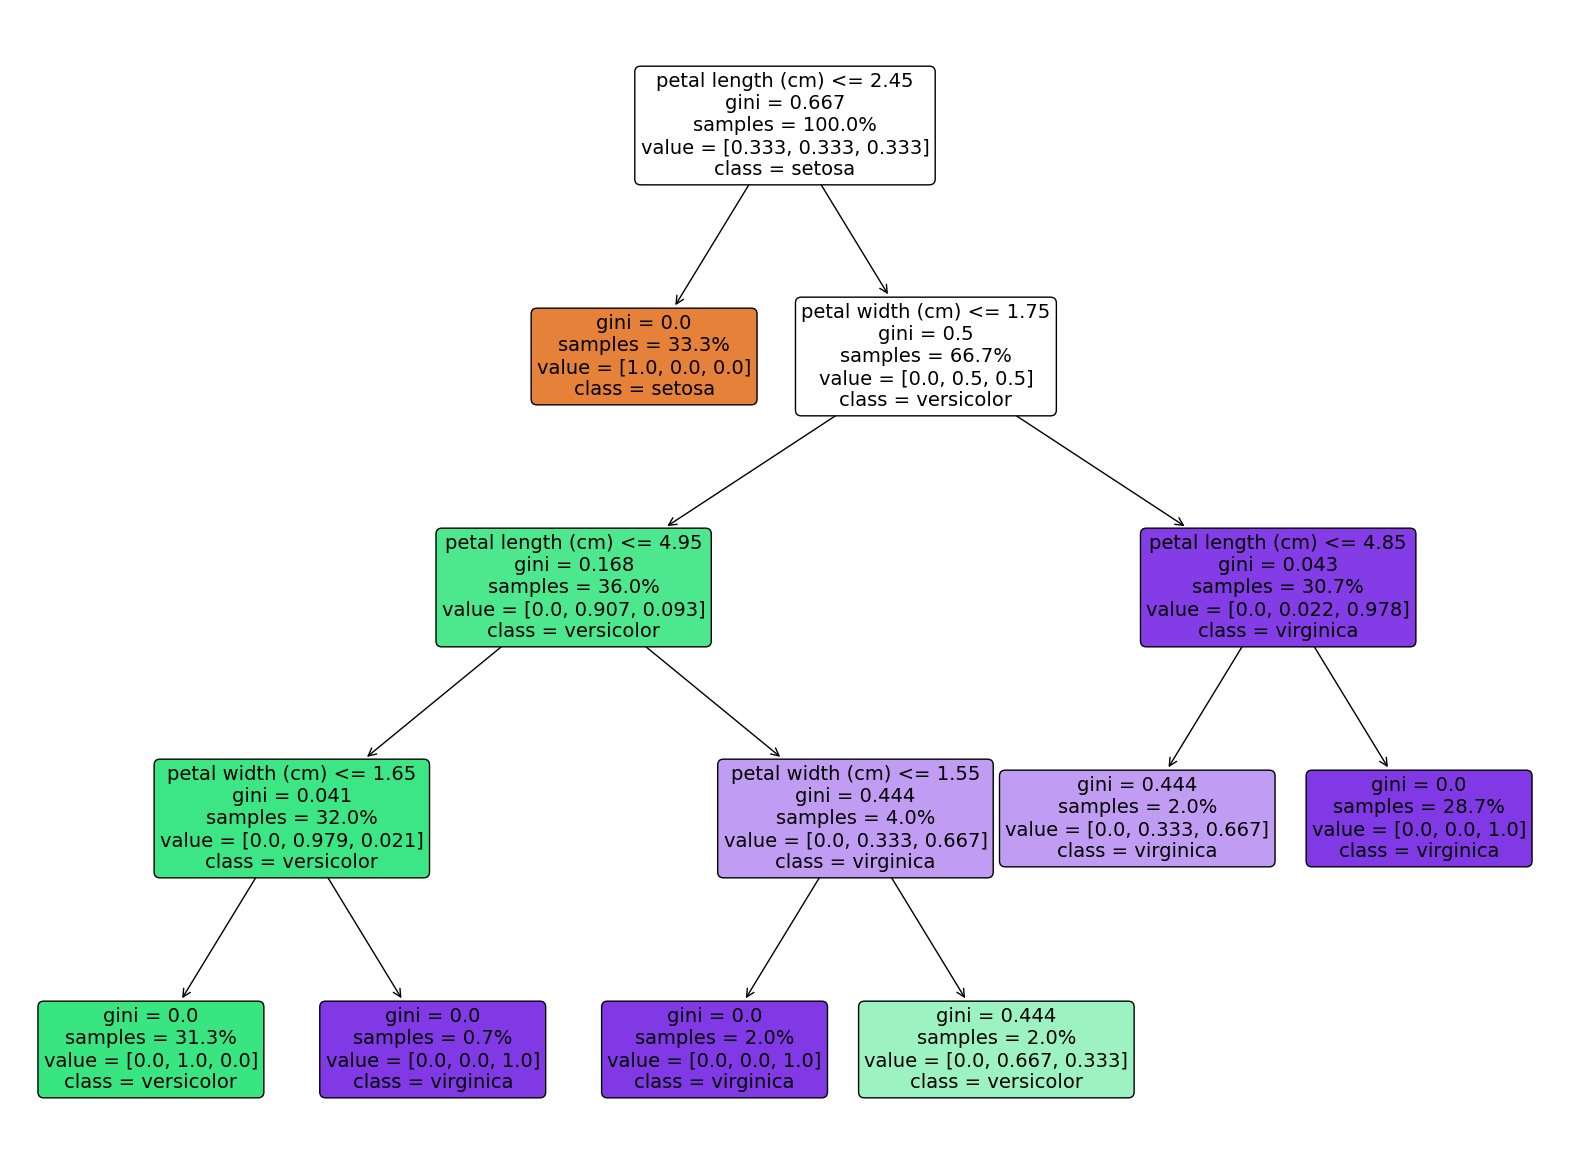

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 15))
tree.plot_tree(tree_model,
                filled = True,
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                proportion = True,
                rounded = True,
                fontsize = 14)
plt.show()

In [ ]:
path = tree_model.cost_complexity_pruning_path(X, y)
cp, ip = path.ccp_alphas, path.impurities

for i in range(len(cp)):
    print(f"cp : {cp[i]:.4f}, impurity : {ip[i]:.4f}")

cp : 0.0000, impurity : 0.0178
cp : 0.0042, impurity : 0.0219
cp : 0.0089, impurity : 0.0308
cp : 0.0131, impurity : 0.0439
cp : 0.0297, impurity : 0.0735
cp : 0.2598, impurity : 0.3333
cp : 0.3333, impurity : 0.6667


In [ ]:
ccp_alphas = []
mean_scores = []

for cp in cp:
    tree_model = DecisionTreeClassifier(random_state = 123, ccp_alpha = cp)
    scores = cross_val_score(tree_model, X, y, cv = 10)
    ccp_alphas.append(cp)
    mean_scores.append(scores.mean())

optimal_index = mean_scores.index(max(mean_scores))

optimal_cp = ccp_alphas[optimal_index]
optimal_cp

0.013055555555555572

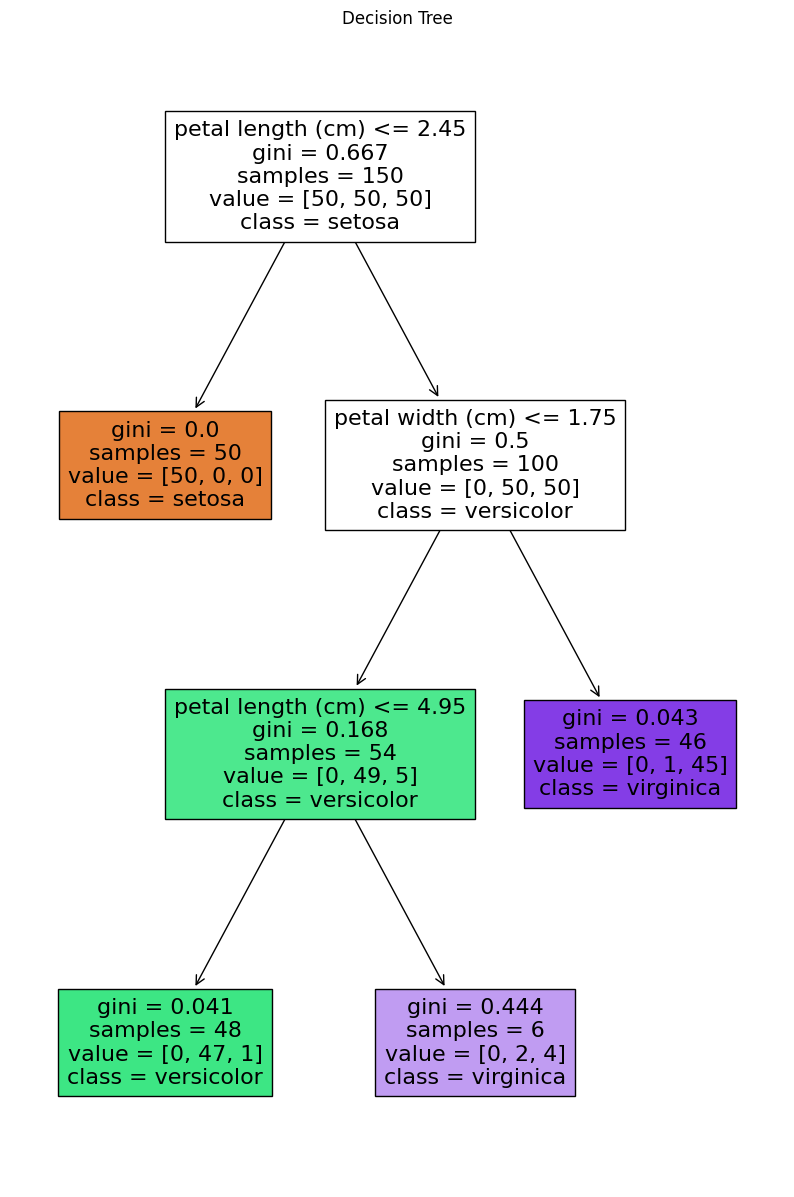

In [ ]:
tree_model = DecisionTreeClassifier(random_state = 123, ccp_alpha = optimal_cp)
tree_model.fit(X, y)

plt.figure(figsize = (10, 15))
plot_tree(tree_model, filled = True, feature_names = iris.feature_names,
          class_names = iris.target_names)
plt.title(f"Decision Tree")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 123)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

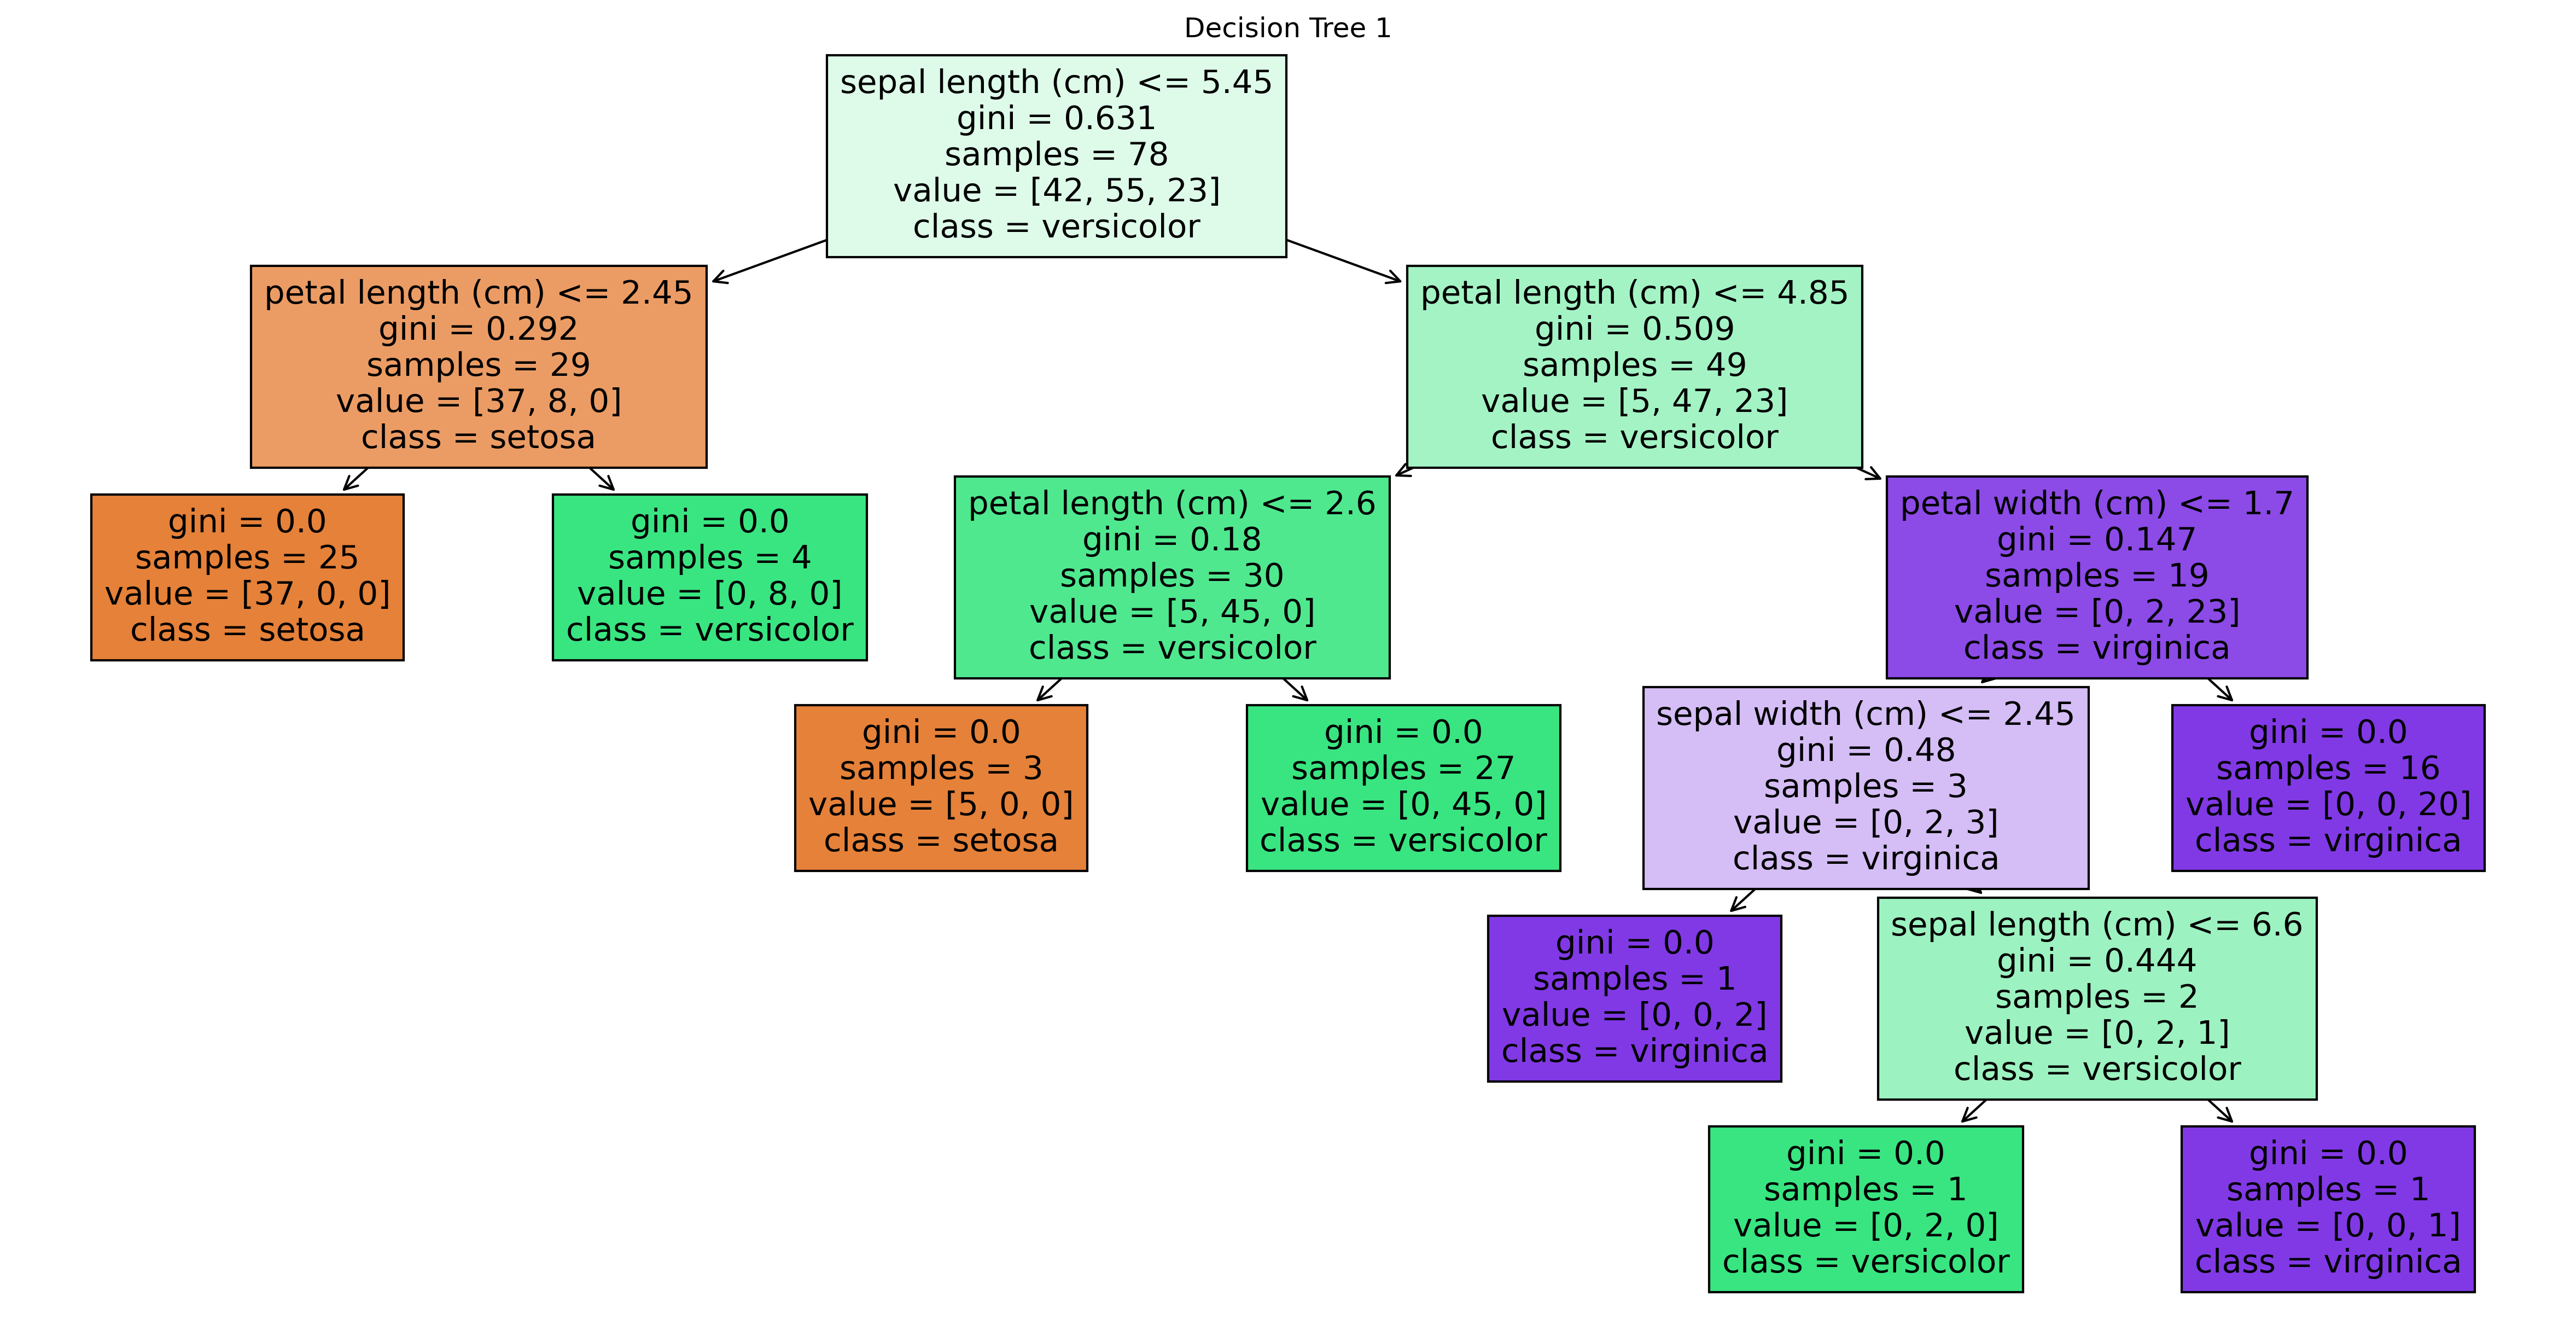

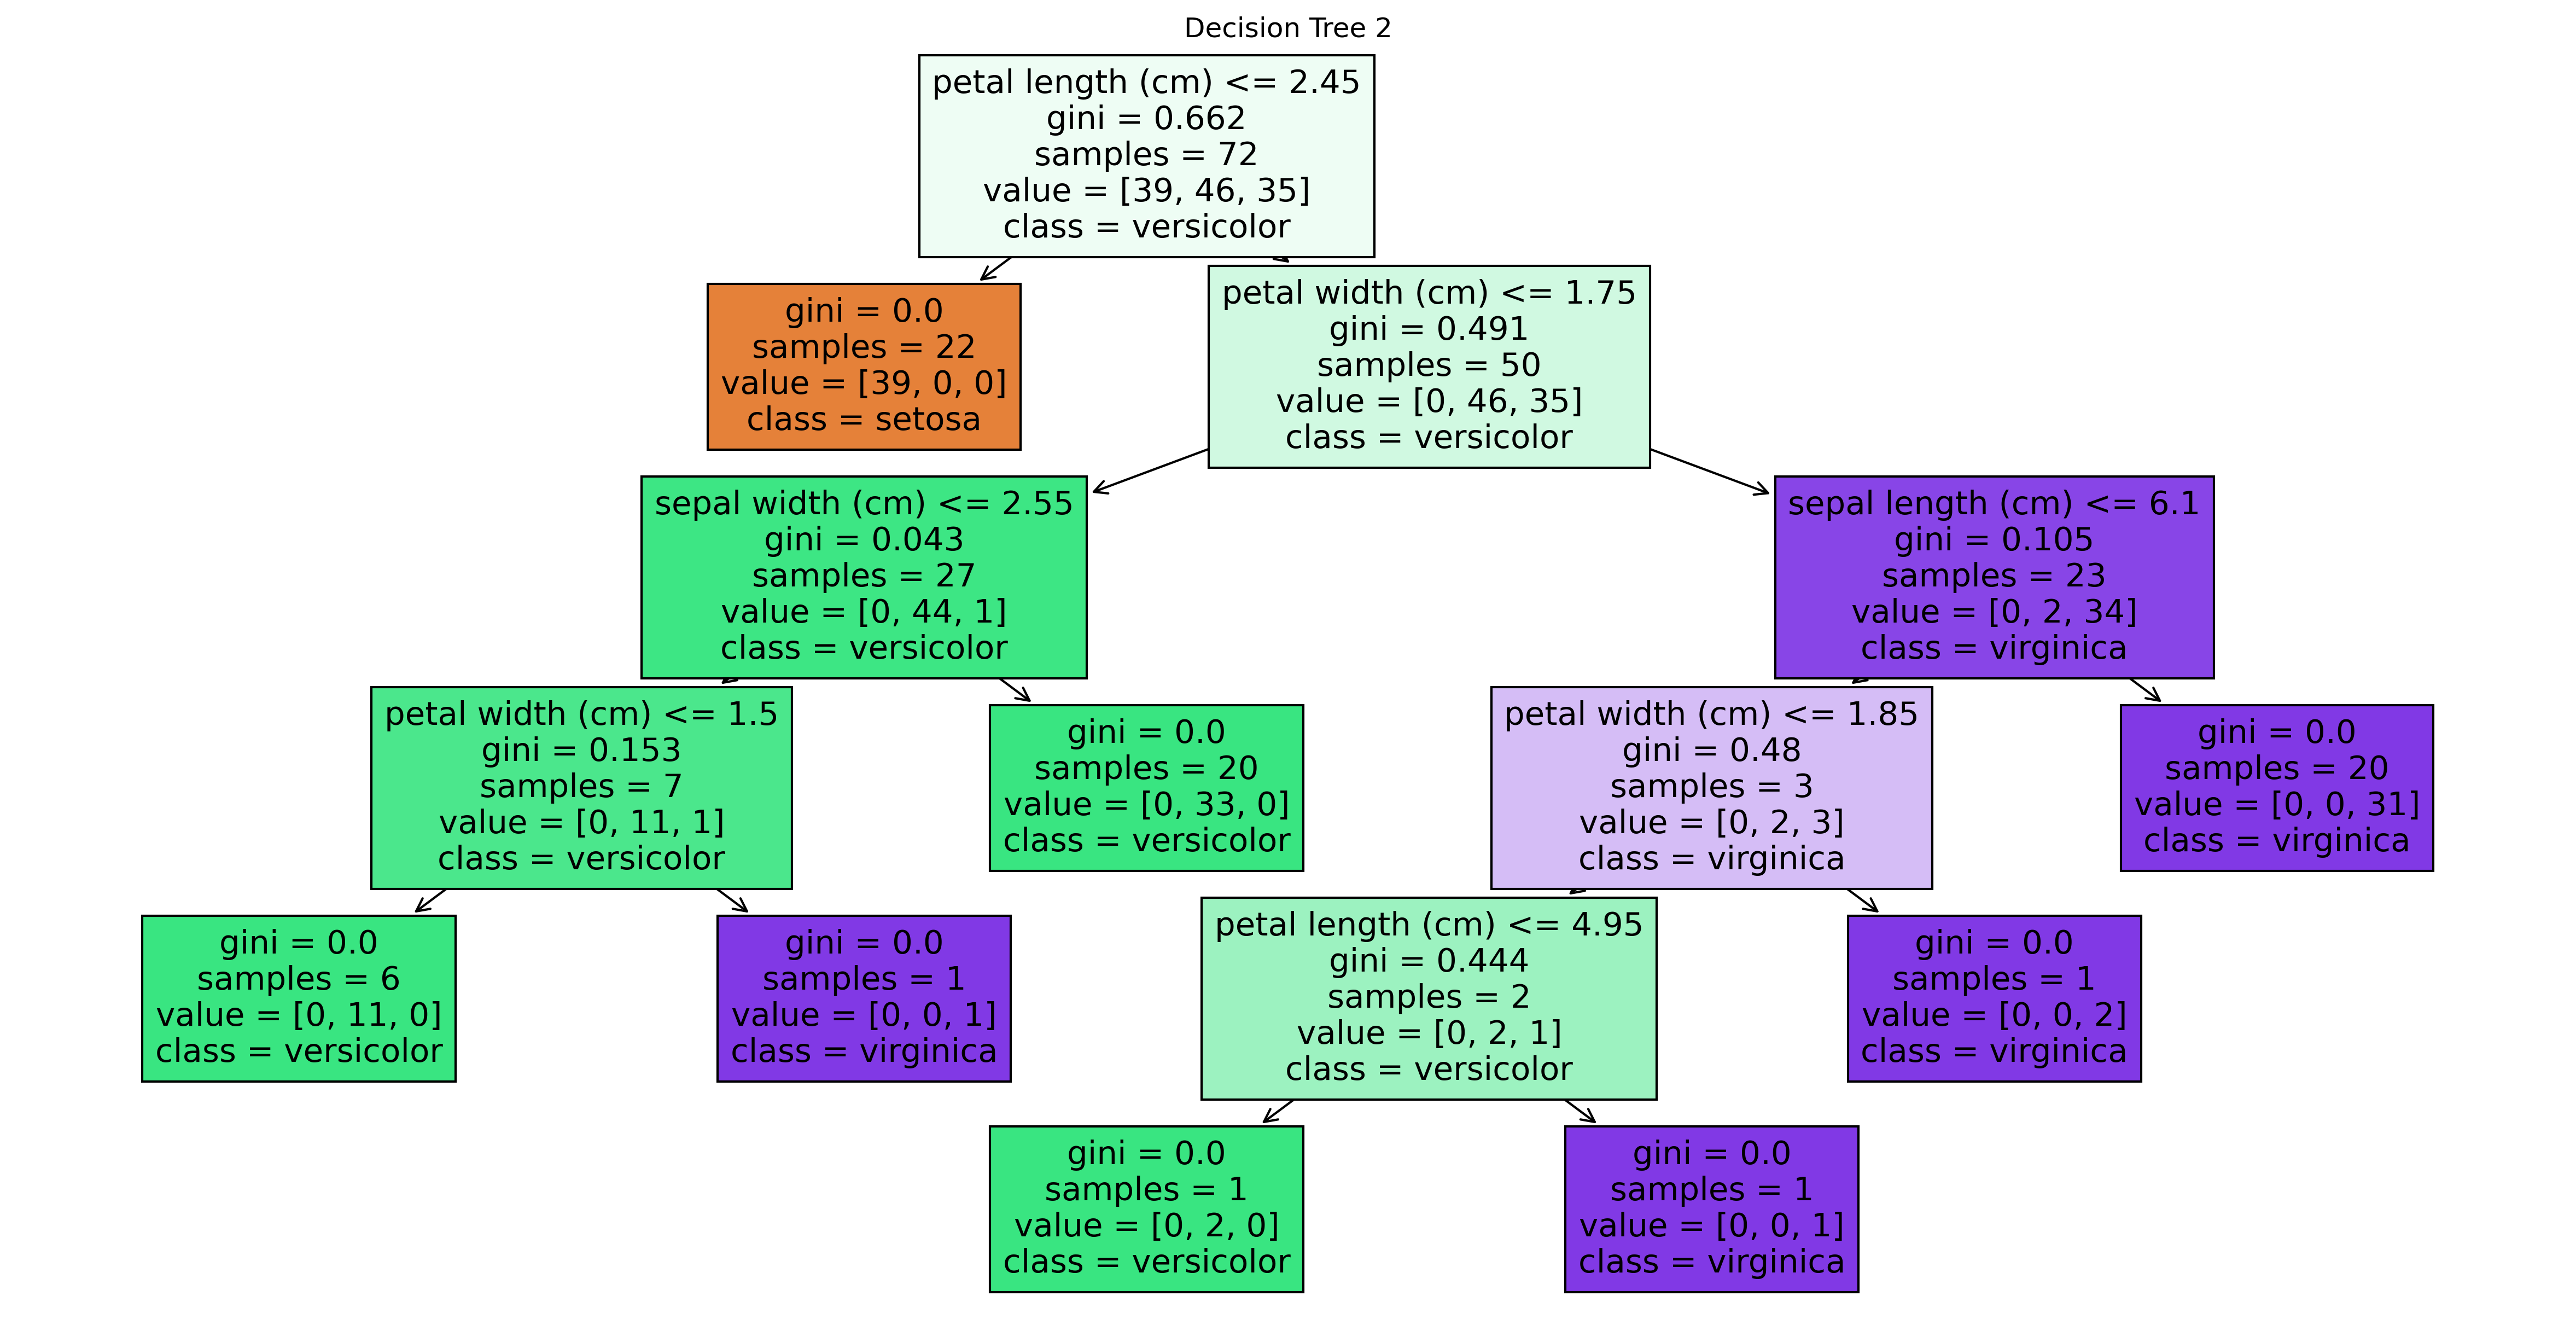

In [ ]:
plt.figure(figsize = (20, 10), dpi = 300)
plot_tree(rf_model.estimators_[0], filled = True, feature_names = iris.feature_names,
          class_names = iris.target_names)
plt.title("Decision Tree 1")
plt.show()

plt.figure(figsize = (20, 10), dpi = 300)
plot_tree(rf_model.estimators_[1], filled = True, feature_names = iris.feature_names,
          class_names = iris.target_names)
plt.title("Decision Tree 2")
plt.show()

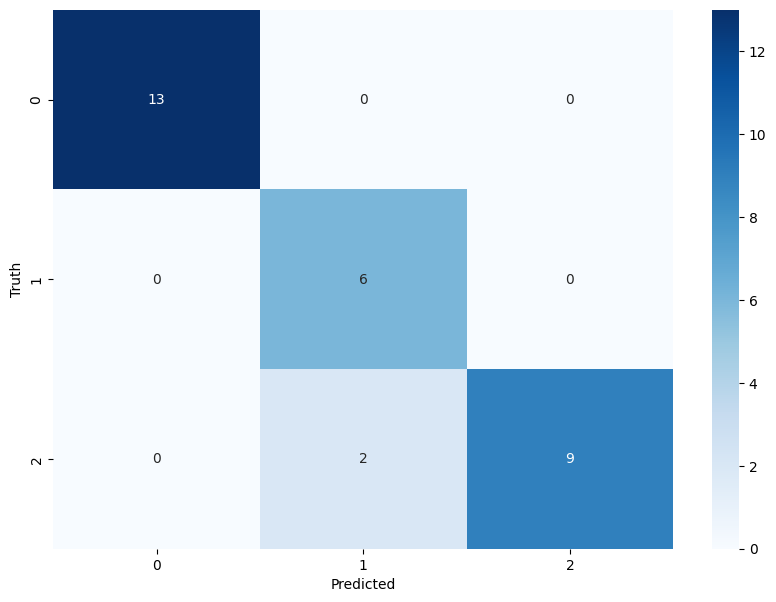

In [ ]:
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

california_housing = fetch_california_housing()

X = pd.DataFrame(california_housing.data, columns = california_housing.feature_names)
y = california_housing.target

min_samples_split = int(0.05 * len(X))

max_depth = 5

path = DecisionTreeRegressor(random_state = 123, min_samples_split = min_samples_split,
                             max_depth = max_depth).cost_complexity_pruning_path(X, y)

cp, ip = path.ccp_alphas, path.impurities

for i in range(len(cp)):
    print(f"cp : {cp[i]:.4f}, Impurity : {ip[i]:.4f}")

ccp = []
scr = []

for cp in cp:
    tree = DecisionTreeRegressor(random_state = 123, ccp_alpha = cp, min_samples_split = min_samples_split,
                                 max_depth = max_depth)
    score = cross_val_score(tree, X, y, cv = 5)
    ccp.append(cp)
    scr.append(score.mean())

cp : 0.0000, Impurity : 0.5157
cp : 0.0021, Impurity : 0.5178
cp : 0.0044, Impurity : 0.5221
cp : 0.0054, Impurity : 0.5276
cp : 0.0058, Impurity : 0.5333
cp : 0.0060, Impurity : 0.5394
cp : 0.0066, Impurity : 0.5459
cp : 0.0070, Impurity : 0.5529
cp : 0.0073, Impurity : 0.5602
cp : 0.0087, Impurity : 0.5689
cp : 0.0111, Impurity : 0.5800
cp : 0.0112, Impurity : 0.5911
cp : 0.0117, Impurity : 0.6028
cp : 0.0135, Impurity : 0.6163
cp : 0.0152, Impurity : 0.6315
cp : 0.0193, Impurity : 0.6508
cp : 0.0245, Impurity : 0.6753
cp : 0.0608, Impurity : 0.7361
cp : 0.0774, Impurity : 0.8135
cp : 0.1053, Impurity : 0.9188
cp : 0.4128, Impurity : 1.3316


In [ ]:
optimal_index = scr.index(max(scr))

optimal_cp = ccp[optimal_index]
optimal_cp

0.011063560866431996

In [ ]:
optimal_tree = DecisionTreeRegressor(random_state = 123, ccp_alpha = optimal_cp,
                                     min_samples_split = min_samples_split, max_depth = max_depth)

optimal_tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.011063560866431996, max_depth=5,
                      min_samples_split=1032, random_state=123)

In [ ]:
importance = pd.DataFrame({'feature' : X.columns, 'importance' : optimal_tree.feature_importances_})
importance = importance.sort_values('importance', ascending = False)

importance

,feature,importance
0,MedInc,0.822696
5,AveOccup,0.113426
2,AveRooms,0.025678
1,HouseAge,0.020207
6,Latitude,0.017992
3,AveBedrms,0.000000
4,Population,0.000000
7,Longitude,0.000000


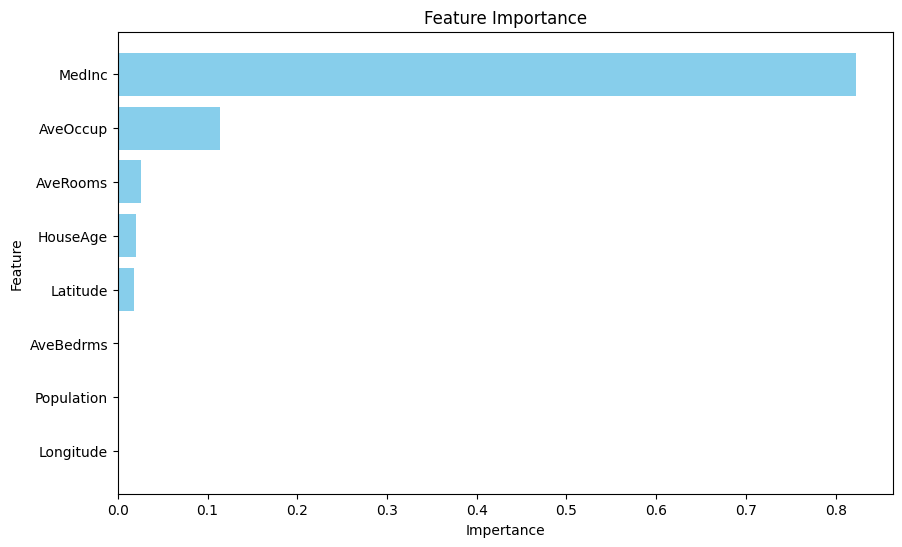

In [ ]:
plt.figure(figsize = (10, 6))
plt.barh(importance['feature'], importance['importance'], color = 'skyblue')
plt.xlabel('Impertance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

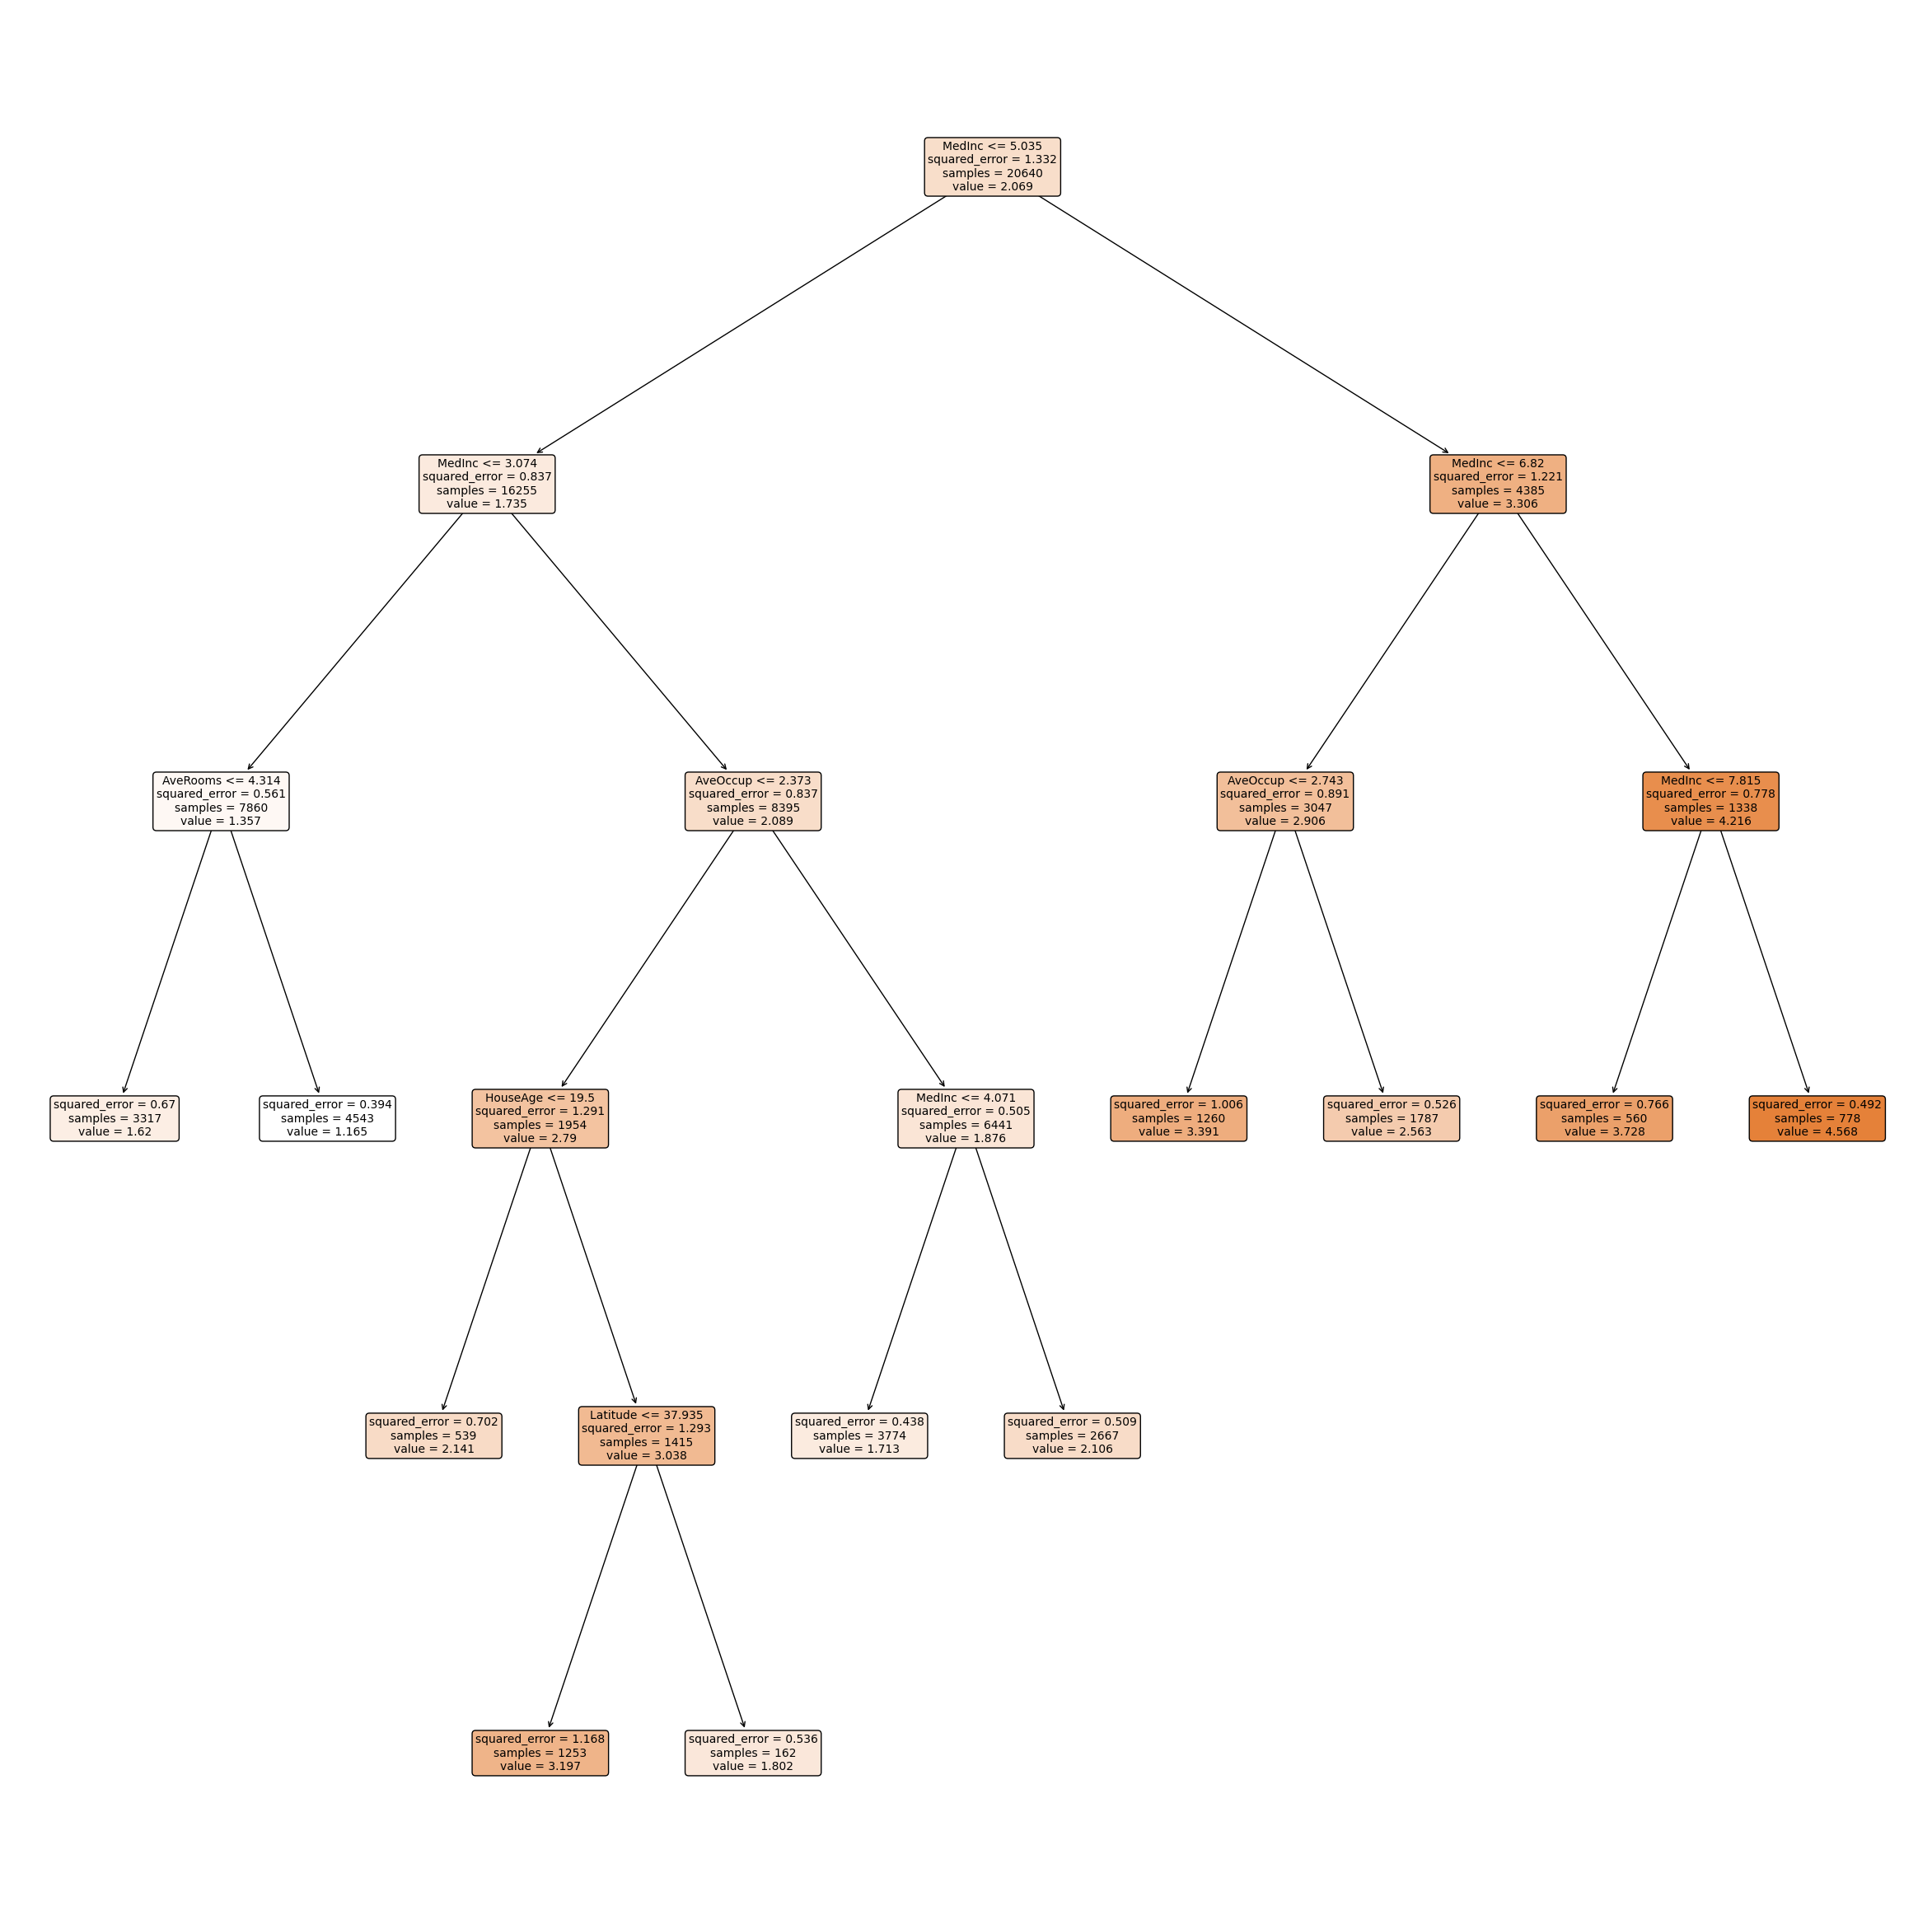

In [ ]:
plt.figure(figsize = (30, 30))
plot_tree(optimal_tree,
          filled = True,
          feature_names = X.columns,
          rounded = True,
          fontsize = 10)
plt.show()